In [1]:
import astropy
from astropy.table import Table, vstack
from astropy.io import fits
import dace
np.random.seed(13)

In [2]:
from utils import *

#### stellar sample

These stars are all HARPS GTO targets (as uniformly characterized by Sousa et al. 2008) with measured vsini (as non-uniformly measured and compiled in Glebocki et al. 2006).

In [3]:
t = Table.read('sousa-vsini-xmatch.vot', format='votable')

/Users/mbedell/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


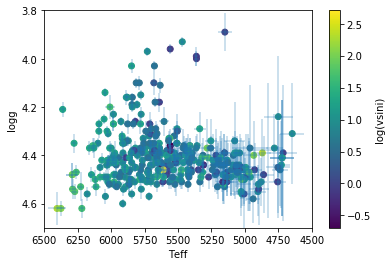

In [4]:
plt.errorbar(t['Teff'], t['logg'], xerr=t['e_Teff'], yerr=t['e_logg'], fmt='none',  alpha=0.3)
plt.scatter(t['Teff'], t['logg'], c=np.log(t['vsini']))
plt.ylim([4.7,3.8])
plt.xlim([6500,4500])
plt.colorbar(label='log(vsini)')
plt.xlabel('Teff')
plt.ylabel('logg');

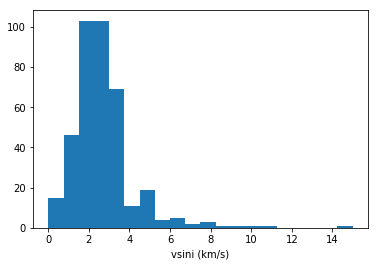

In [5]:
plt.hist(t['vsini'], bins=20)
plt.xlabel('vsini (km/s)');

#### fetch spectra

Generate a list of HARPS spectra we want to download. For now we'll go for 2 spectra each for 10 stars which have been selected across a range of vsini.

In [6]:
stars = []
for lower_vsini in range(0,10,1):
    star = np.random.choice(t[(t['vsini'] > lower_vsini) & (t['vsini'] < 1 + lower_vsini)])
    stars.append(star[3])

In [7]:
for s in stars:
    print('star {0}: vsini = {1:.2f} km/s'.format(s, t[t['Star'] == s]['vsini'].data[0]))

star b'HD 110619': vsini = 0.90 km/s
star b'HD 104982': vsini = 1.80 km/s
star b'HD 145809': vsini = 2.70 km/s
star b'HD 31527': vsini = 3.60 km/s
star b'HD 147512': vsini = 4.50 km/s
star b'HD 44573': vsini = 5.20 km/s
star b'HD 212301': vsini = 6.30 km/s
star b'HD 19994': vsini = 8.40 km/s
star b'HD 19994': vsini = 8.40 km/s
star b'HD 142': vsini = 9.90 km/s


In [8]:
str(stars[0]).strip("'").strip("b'").replace(" ", "") # SUCH A HACK

'HD110619'

In [9]:
targets = []
err_rvs = []
for s in stars:
    starname = str(s).strip("'").strip("b'").replace(" ", "") # SUCH A HACK
    files = download_spectra(starname)
    if files is not None:
        for f in files:
            wave, flux = read_spectrum(f)
            err_rv = calc_rv_err(wave, flux)
            targets.append(s)
            err_rvs.append(err_rv)

Insufficient data returned for HD110619
Insufficient data returned for HD104982
Insufficient data returned for HD145809


2020-02-10 15:52:03,651 - INFO - File downloading on location : HD31527.tar.gz


 Download : 1 MB

2020-02-10 15:52:06,368 - INFO - File downloaded on location : HD31527.tar.gz


 Download : 2 MB
Download done


/Users/mbedell/python/thethethe/utils.py:47: RuntimeWarning: divide by zero encountered in true_divide
  err_rv_perpix = err_flux / df_dv
/Users/mbedell/python/thethethe/utils.py:47: RuntimeWarning: invalid value encountered in true_divide
  err_rv_perpix = err_flux / df_dv


Insufficient data returned for HD147512
Insufficient data returned for HD44573


2020-02-10 15:52:09,010 - INFO - File downloading on location : HD212301.tar.gz


 Download : 1 MB

2020-02-10 15:52:09,897 - INFO - File downloaded on location : HD212301.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD19994
Insufficient data returned for HD19994
Insufficient data returned for HD142


In [10]:
err_rvs

[0.3025009268026467,
 0.23931965863444432,
 0.620085807875661,
 0.6951535616885183]

In [11]:
vmags = []
fehs = []
vsinis = []
for target in targets:
    vmags.append(t[t['Star'] == target]['VMAG'])
    fehs.append(t[t['Star'] == target]['__Fe_H_'])
    vsinis.append(t[t['Star'] == target]['vsini'])   

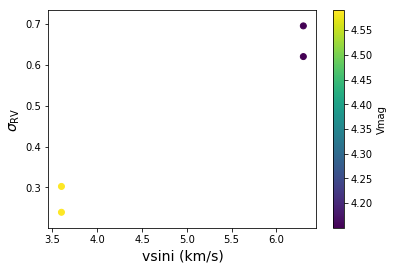

In [12]:
plt.scatter(vsinis, err_rvs, c=vmags)
plt.ylabel(r'$\sigma_{\mathrm{RV}}$', fontsize=14)
plt.xlabel('vsini (km/s)', fontsize=14)
plt.colorbar(label='Vmag');